<a href="https://colab.research.google.com/github/AlexeyTri/Seminars_Med/blob/main/Seminar1_1MED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# –û—Å–Ω–æ–≤–Ω—ã–µ –ø–æ–Ω—è—Ç–∏—è –∏ –ø—Ä–∏–º–µ—Ä—ã –ø—Ä–∏–∫–ª–∞–¥–Ω—ã—Ö –∑–∞–¥–∞—á

# –ò—Å–ø–æ–ª—å–∑—É–µ–º—ã–µ –ø–∞–∫–µ—Ç—ã

In [1]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    !wget -q -O requirements.txt https://raw.githubusercontent.com/andriygav/MachineLearningSeminars/master/sem1/requirements.txt
    !pip install -q -r requirements.txt

In [2]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.special import expit
from tqdm.notebook import tqdm
import seaborn as sns
import pandas as pd
import numpy as np
import torch

from sklearn.linear_model import (LogisticRegression,
                                  LinearRegression)
from sklearn.model_selection import LeaveOneOut, KFold

# –ò—Ä–∏—Å—ã –§–∏—à–µ—Ä–∞
–í—ã–±–æ—Ä–∫–∞ –≤–∑—è—Ç–∞ –æ—Ç—Å—é–¥–∞: https://archive.ics.uci.edu/ml/datasets/iris

## –ó–∞–≥—Ä—É–∑–∫–∞ –≤—ã–±–æ—Ä–∫–∏

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/andriygav/MachineLearningSeminars/master/sem1/data/iris.csv',
                      header=None,
                      names=['–¥–ª–∏–Ω–∞ —á–∞—à–µ–ª–∏—Å—Ç–∏–∫–∞', '—à–∏—Ä–∏–Ω–∞ —á–∞—à–µ–ª–∏—Å—Ç–∏–∫–∞',
                             '–¥–ª–∏–Ω–∞ –ª–µ–ø–µ—Å—Ç–∫–∞', '—à–∏—Ä–∏–Ω–∞ –ª–µ–ø–µ—Å—Ç–∫–∞', '–∫–ª–∞—Å—Å'])
dataset.sample(5, random_state=0)

–¥–ª–∏–Ω–∞ —á–∞—à–µ–ª–∏—Å—Ç–∏–∫–∞  —à–∏—Ä–∏–Ω–∞ —á–∞—à–µ–ª–∏—Å—Ç–∏–∫–∞  ...  —à–∏—Ä–∏–Ω–∞ –ª–µ–ø–µ—Å—Ç–∫–∞            –∫–ª–∞—Å—Å
114                5.8                 2.8  ...              2.4   Iris-virginica
62                 6.0                 2.2  ...              1.0  Iris-versicolor
33                 5.5                 4.2  ...              0.2      Iris-setosa
107                7.3                 2.9  ...              1.8   Iris-virginica
7                  5.0                 3.4  ...              0.2      Iris-setosa

[5 rows x 5 columns]

## –ù–∞—á–∞–ª–æ —Ä–∞–±–æ—Ç—ã —Å –¥–∞–Ω–Ω—ã–º–∏
1. –û–ø—Ä–µ–¥–µ–ª–∏—Ç—å –º–Ω–æ–∂–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤:
    * –û–ø—Ä–µ–¥–µ–ª–∏—Ç—å —Ä–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏
    * –û–ø—Ä–µ–¥–µ–ª–∏—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫–æ—Ç–æ—Ä—ã–º–∏ –æ–ø–∏—Å—ã–≤–∞—é—Ç—Å—è –æ–±—ä–µ–∫—Ç—ã
2. –û–ø—Ä–µ–¥–µ–ª–∏—Ç—å –º–Ω–æ–∂–µ—Å—Ç–≤–æ –æ—Ç–≤–µ—Ç–æ–≤
3. –û–ø—Ä–µ–¥–µ–ª–∏—Ç—å —Ç–∏–ø –∑–∞–¥–∞—á–∏ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è
6. ...

### –ú–Ω–æ–∂–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤
–í –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–∏ –º–Ω–æ–∂–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤ –æ–ø–∏—Å—ã–≤–∞–µ—Ç—Å—è $n=4$ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏:
1. –î–ª–∏–Ω–∞ —á–∞—à–µ–ª–∏—Å—Ç–∏–∫–∞
2. –®–∏—Ä–∏–Ω–∞ —á–∞—à–µ–ª–∏—Å—Ç–∏–∫–∞
3. –î–ª–∏–Ω–∞ –ª–µ–ø–µ—Å—Ç–∫–∞
4. –®–∏—Ä–∏–Ω–∞ –ª–µ–ø–µ—Å—Ç–∫–∞

In [ ]:
print('–†–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç l={} –æ–±—ä–µ–∫—Ç–æ–≤.'.format(len(dataset)))

–†–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç l=150 –æ–±—ä–µ–∫—Ç–æ–≤.


–í—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —è–≤–ª—è—é—Ç—Å—è –≤–µ—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏. –§–æ—Ä–º–∞–ª—å–Ω–æ –æ–±—ä–µ–∫—Ç—ã $\mathbf{X}$ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç—å—Å—è –≤ —Å–ª–µ–¥—É—é—â–µ–º –≤–∏–¥–µ:
$$\mathbf{X} \in \mathbb{R}^{l\times n},$$
–≥–¥–µ $l$ —á–∏—Å–ª–æ –æ–±—ä–µ–∫—Ç–æ–≤, –∞ $n$ —á–∏—Å–ª–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

–ü–æ–ª—É—á–∞–µ–º, —á—Ç–æ $\mathbf{X}$ —ç—Ç–æ –Ω–µ–∫–æ—Ç–æ—Ä–∞—è –≤–µ—â–µ—Å—Ç–≤–µ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ —Ä–∞–∑–º–µ—Ä–∞ $l\times n$.

### –ú–Ω–æ–∂–µ—Å—Ç–≤–æ –æ—Ç–≤–µ—Ç–æ–≤
–í –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–µ –º–Ω–æ–∂–µ—Å—Ç–≤–æ –æ—Ç–≤–µ—Ç–æ–≤ —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ —Ç—Ä–µ—Ö —ç–ª–µ–º–µ–Ω—Ç–æ–≤:
1. Iris-virginica
2. Iris-versicolor
3. Iris-setosa

### –ó–∞–¥–∞—á–∞ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è
–í –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ, —Ç–∞–∫ –∫–∞–∫ –º–æ—â–Ω–æ—Å—Ç—å –º–Ω–æ–∂–µ—Å—Ç–≤–∞ $|\mathbf{y}|=3 \ll l=150$ –ø–æ–ª—É—á–∞–µ–º –∑–∞–¥–∞—á—É –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –Ω–∞ $M=3$ –∫–ª–∞—Å—Å–∞.

## –ê–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö
–°–Ω–∞—á–∞–ª–∞ –ø—Ä–æ—ç–∫—Ç–∏—Ä—É–µ–º –≤—Å–µ –æ–±—ä–µ–∫—Ç—ã –Ω–∞ –¥–≤—É–º–µ—Ä–Ω—ã–µ –ø–ª–æ—Å–∫–æ—Å—Ç–∏, –¥–ª—è —É–ø—Ä–æ—â–µ–Ω–∏—è –∞–Ω–∞–ª–∏–∑–∞

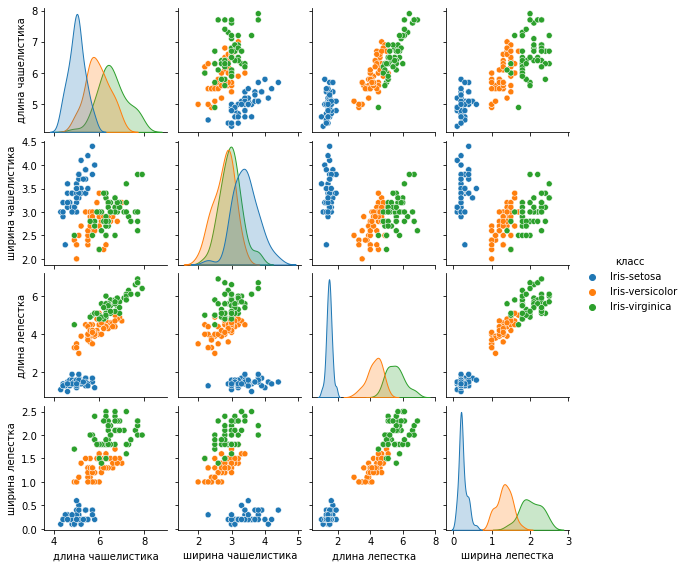

In [ ]:
sns.pairplot(dataset, hue='–∫–ª–∞—Å—Å', height=2)
plt.show()

–ò–∑ —Ä–∏—Å—É–Ω–∫–∞ –≤–∏–¥–Ω–æ, —á—Ç–æ –∫–ª–∞—Å—Å —Å–∏–Ω–∏—Ö —Ç–æ—á–µ–∫ (Iris-setosa) –ª–µ–≥–∫–æ –æ—Ç–¥–µ–ª—è–µ—Ç—Å—è –æ—Ç –¥–≤—É—Ö –¥—Ä—É–≥–∏—Ö —Ü–≤–µ—Ç–æ–≤. –û—Ä–∞–Ω–¥–∂–µ–≤—ã–µ –∏ –∑–µ–ª–µ–Ω–Ω—ã–µ —Ç–æ—á–∫–∏ –æ—Ç–¥–µ–ª—è—é—Ç—Å—è –Ω–µ —Ç–∞–∫ –ø—Ä–æ—Å—Ç–æ –≤ –∫–∞–∂–¥–æ–π –∏–∑ –ø—Ä–æ—ç–∫—Ü–∏–π, –Ω–æ –≤—Å–µ —Ä–∞–≤–Ω–æ –º–æ–∂–Ω–æ –ø—Ä–æ–≤–µ—Å—Ç–∏ –ø—Ä—è–º—É—é, –∫–æ—Ç–æ—Ä–∞—è –æ—Ç–¥–µ–ª–∏—Ç –æ—Ä–∞–Ω–¥–∂–µ–≤—ã–µ —Ç–æ—á–∫–∏ –æ—Ç –∑–µ–ª–µ–Ω—ã—Ö.

## –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
### –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
–ö–∞–∫ –±—ã–ª–æ —Å–∫–∞–∑–∞–Ω–æ —Ä–∞–Ω–µ–µ –Ω–∞–º —Ç—Ä–µ–±—É–µ—Ç—Å—è —Ä–µ—à–∏—Ç—å –∑–∞–¥–∞—á—É –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –Ω–∞ 3 –∫–ª–∞—Å—Å–∞. –ù–æ –¥–ª—è –Ω–∞–≥–ª—è–¥–Ω–æ—Å–∏ —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º –±–∏–Ω–∞—Ä–Ω—É—é –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—é (–∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—é –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ –∫–ª–∞—Å—Å–æ–≤ —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º –≤ —Å–ª–µ–¥—É—é—â–µ–π –ª–µ–∫—Ü–∏–∏).

–ß—Ç–æ–±—ã –∏—Å—Ö–æ–¥–Ω—É—é –∑–∞–¥–∞—á—É –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –≤ –∑–∞–¥–∞—á—É –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —É–±–µ—Ä–µ–º –∏–∑ –≤—ã–±–æ—Ä–∫–∏ –≤—Å–µ –æ–±—ä–µ–∫—Ç–∞ –∫–ª–∞—Å—Å–∞ Iris-setosa.

In [ ]:
binary_dataset = dataset.drop(index=dataset.index[dataset['–∫–ª–∞—Å—Å'] == 'Iris-setosa'])

–ö–ª–∞—Å—Å—ã –∑–∞–∫–æ–¥–∏—Ä—É–µ–º —Ü–µ–ª—ã–º–∏ —á–∏—Å–ª–∞–º–∏ $-1$ –∏ $1$.

In [ ]:
binary_dataset.loc[dataset['–∫–ª–∞—Å—Å'] == 'Iris-versicolor', dataset.columns == '–∫–ª–∞—Å—Å'] = -1
binary_dataset.loc[dataset['–∫–ª–∞—Å—Å'] == 'Iris-virginica', dataset.columns == '–∫–ª–∞—Å—Å'] = 1

–ü–æ–ª—É—á–∞–µ–º –∑–∞–¥–∞—á—É –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

### –ú–æ–¥–µ–ª—å –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤

–ú–æ–¥–µ–ª—å –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ $\mathfrak{F}$ –≤ –º–∞—à–∏–Ω–Ω–æ–º –æ–±—É—á–µ–Ω–∏–∏ —ç—Ç–æ –Ω–µ–∫–æ—Ç–æ—Ä–æ–µ –º–Ω–æ–∂–µ—Å—Ç–≤–æ —Ñ—É–Ω–∫—Ü–∏–π, –∫–æ—Ç–æ—Ä—ã–µ –¥–µ–π—Å—Ç–≤—É—é—Ç –∏–∑ –º–Ω–æ–∂–µ—Å—Ç–≤–∞ –æ–±—ä–µ–∫—Ç–æ–≤ –≤ –º–Ω–æ–∂–µ—Å—Ç–≤–æ –æ—Ç–≤–µ—Ç–æ–≤, –≤ –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ:
$$\mathfrak{F} = \{f| f: \mathbb{R}^n \to \{-1, 1\}, \text{–µ—â–µ –∫–∞–∫–∏–µ-—Ç–æ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è}\},$$
–æ–±—ã—á–Ω–æ $\mathfrak{F}$ —ç—Ç–æ –Ω–µ–∫–æ—Ç–æ—Ä–æ–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–æ–µ —Å–µ–º–µ—Å—Ç–≤–æ —Ñ—É–Ω–∫—Ü–∏–π, —Ç–æ–µ—Å—Ç—å —Ä–∞–∑–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ $f$ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –¥—Ä—É–≥ –æ—Ç –¥—Ä—É–≥–∞ —Ç–æ–ª—å–∫–æ –∫–∞–∫–∏–º-—Ç–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–º. –ü—Ä–æ—Å—Ç—ã–º –ø—Ä–∏–º–µ—Ä–æ–º –ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–º —Å–µ–º–µ–π—Å—Ç–≤–æ–º —Ñ—É–Ω–∫—Ü–∏–π –¥–ª—è –∑–∞–¥–∞—á–∏ –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —è–≤–ª—è–µ—Ç—Å—è —Å–µ–º–µ–π—Å—Ç–≤–æ –ª–∏–Ω–µ–π–Ω—ã–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä:
$$\mathfrak{F}_{bcl} = \left\{f\bigr(\theta, \mathbf{x}\bigr)=\text{sign}\bigr(\theta^{\mathsf{T}}\mathbf{x}\bigr)\bigr| \theta \in \mathbb{R}^{n} \right\}.$$


### –§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å

–ú–∞—à–∏–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ —ç—Ç–æ –≤—Å–µ–≥–¥–∞ –≤—ã–±–æ—Ä —Ñ—É–Ω–∫—Ü–∏–∏ –∏–∑ –º–Ω–æ–∂–µ—Å—Ç–≤–∞ $\mathfrak{F}$. –ß—Ç–æ–±—ã –≤—ã–±—Ä–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é, –Ω—É–∂–µ–Ω –Ω–µ–∫–æ—Ç–æ—Ä—ã–π –∫—Ä–∏—Ç–µ—Ä–∏–π –ø–æ –∫–æ—Ç–æ—Ä–æ–º—É –æ–Ω–∞ –≤—ã–±–∏—Ä–∞–µ—Ç—Å—è, —Ç–æ –µ—Å—Ç—å –Ω—É–∂–Ω–æ —É–ø–æ—Ä—Ä—è–¥–æ—á–∏—Ç—å –≤—Å–µ —Ñ—É–Ω–∫—Ü–∏–∏ –æ—Ç —Ö—É–¥—à–µ–π –∫ –ª—É—á—à–µ–π. –î–ª—è —ç—Ç–æ–≥–æ –ø–æ—Å—Ç—Ä–æ–µ–º —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª $\mathcal{L}$, –∫–æ—Ç–æ—Ä—ã–π –∫–∞–∂–¥–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ $f \in \mathfrak{F}$ —Å—Ç–∞–≤–∏—Ç –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —á–∏—Å–ª–æ –∏–∑ $\mathbb{R}_+$. –í –º–∞—à–∏–Ω–Ω–æ–º –æ–±—É—á–µ–Ω–∏–∏ –æ–±—ã—á–Ω–æ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª –∫–∞—á–µ—Å—Ç–≤–∞ –≤–æ–¥–∏—Ç—å—Å—è –∫–∞–∫ –Ω–µ–∫–æ—Ç–æ—Ä–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ –≤—ã–±–æ—Ä–∫–µ. –í –æ–±—â–µ–º –≤–∏–¥–µ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–∂–Ω–æ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç—å –≤ —Å–ª–µ–¥—É—é—â–µ–º –≤–∏–¥–µ:
$$\mathcal{L}\bigr(f, \mathbf{X}, \mathbf{y}\bigr) = \sum_{i=1}^l\mathcal{q}\bigr(f, \mathbf{x}_i, y_i\bigr),$$
–≥–¥–µ $q$ –Ω–µ–∫–æ—Ç–æ—Ä–∞—è —Ñ—É–Ω–∫—Ü–∏—è –æ—à–∏–±–∫–∏ –Ω–∞ –Ω–µ–∫–æ—Ç–æ—Ä–æ–º –æ–±—ä–µ–∫—Ç–µ $\mathbf{x}$. –§—É–Ω–∫—Ü–∏–æ–Ω–∞–ª –∫–∞—á–µ—Å—Ç–≤–∞ $\mathcal{L}$ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è —ç–º–ø–µ—Ä–∏—á–µ—Å–∫–∏–º —Ä–∏—Å–∫–æ–º.

### –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏–æ–Ω–Ω–∞—è –∑–∞–¥–∞—á–∞

–î–∞–ª–µ–µ –Ω—É–∂–Ω–æ –ø–æ—Å—Ç–∞–≤–∏—Ç—å –∑–∞–¥–∞—á—É –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –¥–ª—è –≤—ã–±–æ—Ä–∞ $f \in \mathfrak{F}$. –ó–¥–µ—Å—å –≤—Å–µ –ø—Ä–æ—Å—Ç–æ, –ø—Ä–æ—Å—Ç–æ –º–∏–Ω–∏–º–∏–∑–∏—Ä—É–µ–º —ç–º–ø–µ—Ä–∏—á–µ—Å–∫–∏–π —Ä–∏—Å–∫:
$$\hat{f} = \arg \min_{f \in \mathfrak{F}} \mathcal{L}\bigr(f, \mathbf{X}, \mathbf{y}\bigr).$$

–í–∞–∂–Ω–æ! –í —Ä–µ–∑—É–ª—å—Ç–µ —Ñ—É–Ω–∫—Ü–∏—è $\hat{f}$ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –≤—ã–±–æ—Ä–∫–∏ $\left(\mathbf{X}, \mathbf{y}\right)$, —Ç–æ –µ—Å—Ç—å –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –Ω–∞–±–æ—Ä–æ–≤ –¥–∞–Ω–Ω—ã—Ö –æ–ø—Ç–∏–º–∞–ª—å–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –±—É–¥–µ—Ç —Ä–∞–∑–ª–∏—á–Ω–∞—è.

–í–µ—Ä–Ω–µ–º—Å—è –∫ –Ω–∞—à–µ–π –∑–∞–¥–∞—á–µ. –í –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª –∫–∞—á–µ—Å—Ç–≤–∞ –±—É–¥–µ—Ç –∏–º–µ—Ç—å —Å–ª–µ–¥—É—é—â–∏–π –≤–∏–¥:
$$\mathcal{L}\bigr(\theta, \mathbf{X}, \mathbf{y}\bigr) = \sum_{i=1}^l\bigr[f\bigr(\theta, \mathbf{x}_i\bigr) \not= y_i\bigr],$$
–∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–æ–Ω–Ω–∞—è –∑–∞–¥–∞—á–∞ –ø–µ—Ä–µ–ø–∏—Å—ã–≤–∞–µ—Ç—Å—è –≤ –≤–∏–¥–µ:
$$\hat{\theta} = \arg \min_{\theta \in \mathbb{R}^n} \sum_{i=1}^l\bigr[f\bigr(\theta, \mathbf{x}_i\bigr) \not= y_i\bigr].$$

–ò –Ω–∞ —Å–∞–º–æ–º –¥–µ–ª–µ –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º –±—É–¥–µ–º —Ä–µ—à–∞—Ç—å –∏–º–º–µ–Ω–æ —Ç–∞–∫–∏–µ –∑–∞–¥–∞—á–∏, –Ω–∞ –ø–æ–∏—Å–∫ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞. –°–∞–º–æ —Ä–µ—à–µ–Ω–∏–µ –∑–∞–¥–∞—á–∏ –ª–∏–Ω–µ–π–Ω–æ–π –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –±—É–¥–µ—Ç –Ω–∞ —Å–ª–µ–¥—É—é—â–µ–π –ª–µ–∫—Ü–∏–∏. –°–µ–π—á–∞—Å –∏—Å–ø–æ–ª—å–∑—É–µ–º—Å—è –±–∏–±–ª–∏–æ—Ç–µ–∫–∞–º–∏ –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–∏. –î–∞–ª–µ–µ –≤ –ø—Ä–∏–º–µ—Ä–µ –±—É–¥–µ—Ç –Ω–∞–π–¥–µ–Ω –ø–∞—Ä–∞–º–µ—Ç—Ä $\hat{\theta}$ –Ω–µ –∫–∞–∫ —Ä–µ—à–µ–Ω–∏–µ –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ —ç—Ç–æ–π –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–æ–Ω–Ω–æ–π –∑–∞–¥–∞—á–∏, –∞ –Ω–µ–º–Ω–æ–≥–æ –∏–∑–º–µ–Ω–µ–Ω–Ω–æ–π, –Ω–æ –æ–± —ç—Ç–æ–º –ø–æ–∑–∂–µ –≤ —Å–ª–µ–¥—É—é—â–µ–π –ª–µ–∫—Ü–∏–∏.

### –ü–æ–∏—Å–∫ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –≤–µ–∫—Ç–æ—Ä–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
–ü–µ—Ä–µ–π–¥–µ–º –∫ –¥–≤—É–º –º–∞—Ç—Ä–∏—Ü–∞–º:
1. –ú–∞—Ç—Ä–∏—Ü–µ –æ–±—ä–µ–∫—Ç–æ–≤ $\mathbf{X} \in \mathbb{R}^{l\times (n+1)}$
2. –í–µ–∫—Ç–æ—Ä—É –æ—Ç–≤–µ—Ç–æ–≤ $\mathbf{y} \in \{-1,1\}^l$

–ó–∞–º–µ—Ç–∏–º, —á—Ç–æ –æ–±—ä–µ–∫—Ç—ã –º—ã –ø–æ–≥—Ä—É–∑–∏–ª–∏ –≤ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ –±–æ–ª–µ–µ –±–æ–ª—å—à–æ–π —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏, –¥–æ–±–∞–≤–∏–≤ –µ—â–µ –æ–¥–∏–Ω –ø—Ä–∏–∑–Ω–∞–∫, –∫–æ—Ç–æ—Ä—ã–π —É –≤—Å–µ—Ö –æ–±—ä–µ–∫—Ç–æ–≤ –±—É–¥–µ—Ç —Ä–∞–≤–µ–Ω $1$.

In [ ]:
X = binary_dataset.iloc[:, binary_dataset.columns != '–∫–ª–∞—Å—Å'].values
y = binary_dataset.iloc[:, binary_dataset.columns == '–∫–ª–∞—Å—Å'].values.reshape(-1)
X = np.array(np.hstack([X, np.ones([len(X), 1])]), dtype=np.float64)
y = np.array(y, dtype=np.int64)

In [ ]:
model = LogisticRegression(random_state=0, max_iter=2000)
_ = model.fit(X, y)

–ü–æ–ª—É—á–∞–µ–º –≤–µ–∫—Ç–æ—Ä –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ $\hat{\theta}$

In [ ]:
model.coef_

array([[-3.94426322e-01, -5.13378130e-01,  2.93108661e+00,
         2.41670685e+00, -5.18829563e-04]])

# –ü–µ—Ä–µ—Ö–æ–¥ –æ—Ç –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∫ –º–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤–æ–π
–¢–µ–ø–µ—Ä—å –∂–µ –æ—Å—Ç–∞–µ—Ç—Å—è –≤–æ–ø—Ä–æ—Å: –∫–∞–∫ –ø–µ—Ä–µ–π—Ç–∏ –æ—Ç –∑–∞–¥–∞—á–∏ –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∫ –º–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤–æ–π? –í –∫–∞—á–µ—Å—Ç–≤–µ –±–∏–Ω–∞—Ä–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞ —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º –≤—Å–µ —Ç—É –∂–µ –º–æ–¥–µ–ª—å –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤:
$$\mathfrak{F}_{bcl} = \left\{f\bigr(\theta, \mathbf{x}\bigr)=\text{sign}\bigr(\theta^{\mathsf{T}}\mathbf{x}\bigr)\bigr| \theta \in \mathbb{R}^{n} \right\}.$$

–ù–æ –∑–Ω–∞–∫ –ø–æ–∑–≤–æ–ª—è–µ—Ç –æ—Ç–¥–µ–ª–∏—Ç—å —Ç–æ–ª—å–∫–æ –¥–≤–∞ –∑–Ω–∞–∫–∞. –ö–∞–∫–∏–µ –∂–µ –µ—Å—Ç—å —Ä–µ—à–µ–Ω–∏—è?

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –≤–∞—Ä–∏–∞–Ω—Ç –ø–µ—Ä–µ—Ö–æ–¥–∞, –∫–æ—Ç–æ—Ä—ã–π –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è –û–¥–∏–Ω –ø—Ä–æ—Ç–∏–≤ –≤—Å–µ—Ö (One VS All). –î–ª—è –ø—Ä–æ—Å—Ç–æ—Ç—ã –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º –ø—Ä–∏–º–µ—Ä –Ω–∞ —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö.

## –ì–µ–Ω–µ—Ä–∞—Ü–∏—è —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–æ–π –≤—ã–±–æ—Ä–∫–∏

In [9]:
np.random.seed(0)
l = 100
n = 2
X1 = np.array([[-1,-1]]) + 0.5*np.random.randn(l, n)
X2 = np.array([[1,1]]) + 0.5*np.random.randn(l, n)
X3 = np.array([[-1,1]]) + 0.5*np.random.randn(l, n)

X = np.vstack([X1, X2, X3])
y = np.hstack([[0]*l, [1]*l, [2]*l])

# –î–æ–±–∞–≤–ª—è–µ–º –∫–æ–Ω—Å—Ç–∞–Ω—Ç—É
X = np.hstack([X, np.ones([len(X), 1])])

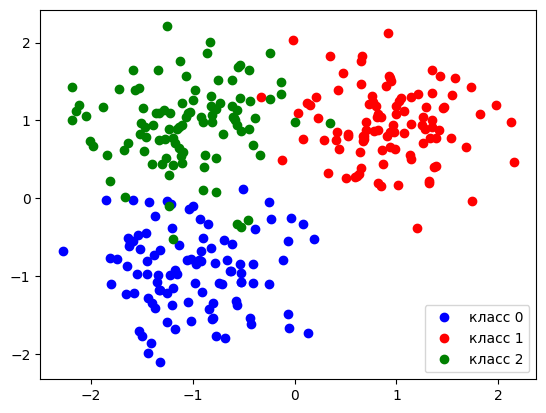

In [4]:
cols = ['blue', 'red', 'green']

# –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ —Ç–æ—á–µ–∫
for k in np.unique(y):
    plt.plot(X[y==k,0], X[y==k,1], 'o', label='–∫–ª–∞—Å—Å {}'.format(k), color=cols[k])

plt.legend(loc='best')
plt.show()

## –û–¥–∏–Ω –ø—Ä–æ—Ç–∏–≤ –≤—Å–µ—Ö

–î–∞–Ω–Ω—ã–µ –º–µ—Ç–æ–¥ –æ—Å–Ω–æ–≤–∞–Ω –Ω–∞ —Ç–æ–º, —á—Ç–æ –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –Ω–∞ $M>2$ –∫–ª–∞—Å—Å–æ–≤ –Ω—É–∂–Ω–æ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å $M$ –ª–∏–Ω–µ–π–Ω—ã—Ö –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä—É—é—Ç $k$-–π –∫–ª–∞—Å—Å –ø—Ä–æ—Ä–∏–≤ –≤—Å–µ—Ö –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤.

–ü–æ—Å—Ç—Ä–æ–∏–º $M=3$ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞, –∫–æ—Ç–æ—Ä—ã–µ –æ—Ç–¥–µ–ª—è—é—Ç –∫–∞–∂–¥—ã–π –∫–ª–∞—Å—Å –æ—Ç –¥–≤—É—Ö –æ—Å—Ç–∞–ª—å–Ω—ã—Ö

In [10]:
models = []
model = LogisticRegression(random_state=0, max_iter=2000, fit_intercept=False)
_ = model.fit(X, np.array(y==0, dtype=np.int64))
models.append(model)

model = LogisticRegression(random_state=0, max_iter=2000, fit_intercept=False)
_ = model.fit(X, np.array(y==1, dtype=np.int64))
models.append(model)

model = LogisticRegression(random_state=0, max_iter=2000, fit_intercept=False)
_ = model.fit(X, np.array(y==2, dtype=np.int64))
models.append(model)

In [11]:
def get_line(a, b, c=0, x_min=-10, x_max=10):
    x1, y1 = -(-b + c)/a, -1
    x2, y2 = -(b + c)/a, 1

    polynomial = np.poly1d(np.polyfit([x1, x2], [y1, y2], 1))
    x_axis = np.linspace(x_min, x_max)
    y_axis = polynomial(x_axis)

    return x_axis, y_axis

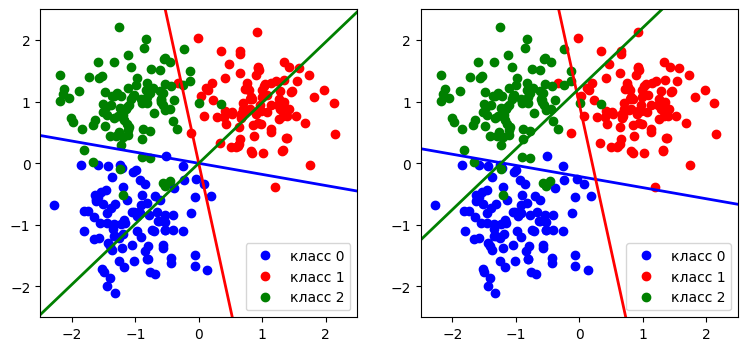

In [12]:
cols = ['blue', 'red', 'green']
fig, gs = plt.figure(figsize=(9,4)), gridspec.GridSpec(1, 2)

ax = []
for i in range(2):
    ax.append(fig.add_subplot(gs[i]))
    ax[i].set_xlim((-2.5, 2.5)), ax[i].set_ylim((-2.5, 2.5))

for k in np.unique(y):
    ax[0].plot(X[y==k,0], X[y==k,1], 'o',
               label='–∫–ª–∞—Å—Å {}'.format(k), color=cols[k])
    ax[1].plot(X[y==k,0], X[y==k,1], 'o',
               label='–∫–ª–∞—Å—Å {}'.format(k), color=cols[k])

for k in np.unique(y):
    ax[0].plot(*get_line(*models[k].coef_[0][:2]), linewidth=2, color=cols[k])
    ax[1].plot(*get_line(*models[k].coef_[0]), linewidth=2, color=cols[k])

ax[0].legend(loc='best'), ax[1].legend(loc='best')
plt.show()

–ü–æ –¥–∞–Ω–Ω–æ–º—É —Ä–∏—Å—É–Ω–∫—É –≤–æ–∑—å–Ω–∏–∫–∞–µ—Ç —Å—Ä–∞–∑—É –Ω–µ—Å–∫–æ–ª—å–∫–æ –≤–æ–ø—Ä–æ—Å–æ–≤:
1. –ö–∞–∫ –≤–∏–¥–Ω–æ –Ω–∞ —Ä–∏—Å—É–Ω–∫–µ –≤ –∫–ª–∞—Å—Å –∑–µ–ª–µ–Ω—ã—Ö —Ç–æ—á–µ–∫ –ø–æ–ø–∞–¥–∞–µ—Ç –º–Ω–æ–≥–æ –∑–µ–ª–µ–Ω–Ω—ã—Ö –∏ –º–Ω–æ–≥–æ –∫—Ä–∞—Å–Ω—ã—Ö —Ç–æ—á–µ–∫. –¢–∞–∫–æ–µ —Å–ª—É—á–∏–ª–æ—Å—å, –ø–æ—Ç–æ–º—É, —á—Ç–æ –º—ã —Å—á–∏—Ç–∞–ª–∏ –ø—Ä–æ—Å—Ç–æ —Å–∫–∞–ª—è—Ä–Ω–æ–µ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏, –±–µ–∑ –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –∞–¥–∏—Ç–∏–≤–Ω–æ–π –∫–æ–Ω—Å—Ç–∞–Ω—Ç—ã, –∫–æ—Ç–æ—Ä–∞—è –≥—Ä—É–±–æ –≥–æ–≤–æ—Ä—è –ø—Ä–∏–±–ª–∏–∂–∞–µ—Ç —Ä–∞–∑–¥–µ–ª—è—é—â—É—é –ø—Ä—è–º—É—é –∫ –∏—Å—Ç–∏–Ω–Ω—ã–º —Ç–æ—á–∫–∞–º –∏–ª–∏ –æ—Ç–¥–∞–ª—è–µ—Ç.
2. –ï—Å—Ç—å —Ç–æ—á–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–∞–¥–∞—é—Ç —Å—Ä–∞–∑—É –≤ –Ω–µ—Å–∫–æ–ª—å–∫–æ –æ–±–ª–∞—Å—Ç–µ–π, —á—Ç–æ –¥–µ–ª–∞—Ç—å —Å –Ω–∏–º–∏? –ó–¥–µ—Å—å –µ—Å—Ç—å –º–Ω–æ–≥–æ –ø–æ–¥—Ö–æ–¥–æ–≤. –ö–∞–∫–∏–µ –µ—Å—Ç—å –≤–∞—Ä–∏–∞–Ω—Ç—ã —É –≤–∞—Å?

–û–¥–∏–Ω –∏–∑ –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤ —Å–ª–µ–¥—É—é—â–∏–π:
1. –í—Å–µ–≥–æ –ø–ª–æ—Å–∫–æ—Å—Ç—å —Ä–∞–∑–¥–µ–ª–µ–Ω–∞ –Ω–∞ 6 –æ–±–ª–∞—Å—Ç–µ–π.
2. –°—á–∏—Ç–∞–µ–º –≤ –∫–∞–∫—É—é –æ–±–ª–∞—Å—Ç—å –ø–æ–ø–∞–ª–∞ —Ç–æ—á–∫–∞ –∏ –ø–æ–ª—É—á–∞–µ–º –Ω—É–∂–Ω—ã–π –∫–ª–∞—Å—Å.

## –ú–µ—Ç–æ–¥—ã –∞–Ω–∞–ª–∏–∑–∞ –∫–∞—á–µ—Å—Ç–≤–∞

–°–∞–º—ã–π –ø—Ä–æ—Å—Ç–æ–π —Å–ø–æ—Å–æ–±–æ —ç—Ç–æ –ø–æ–¥—Å—á–µ—Ç –æ—à–∏–±–æ–∫, –Ω–µ –≤–µ—Ä–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤:
$$\mathcal{L}\bigr(\theta, \mathbf{X}, \mathbf{y}\bigr) = \sum_{i=1}^l\bigr[f\bigr(\theta, \mathbf{x}_i\bigr) \not= y_i\bigr].$$

–¢–∞–∫–∂–µ –º–æ–∂–Ω–æ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å —Ç–∞–±–ª–∏—Ü—É –ø–æ–ø–∞—Ä–Ω—ã—Ö –æ—à–∏–±–æ–∫:

|               | y = 1 | y = 2 | y = 3 |
| ------------- | ----- | ----- | ----- |
| __f(x) = 1__  |  1-1  |  1-2  |  1-3  |
| __f(x) = 2__  |  2-1  |  2-2  |  2-3  |
| __f(x) = 3__  |  3-1  |  3-2  |  3-3  |

–î–∞–Ω–Ω–∞—è —Ç–∞–±–ª–∏—Ü–∞ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —Å–∫–æ–ª—å–∫–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä —Å–¥–µ–ª–∞–ª –æ—à–∏–±–æ–∫ –º–µ–∂–¥—É –¥–≤—É–º—è –ø–∞—Ä–∞–º–∏ –∫–ª–∞—Å—Å–æ–≤. –ù–∞–ø—Ä–∏–º–µ—Ä:
1. 2-3 —ç—Ç–æ —á–∏—Å–ª–æ, –∫–æ—Ç–æ—Ä–æ–µ –æ–±–æ–∑–Ω–∞—á–∞–µ—Ç, —Å–∫–æ–ª—å–∫–æ –æ–±—ä–µ–∫—Ç–æ–≤ –∫–ª–∞—Å—Å–∞ $3$ –æ–±—ä–µ–∫—Ç –æ—Ç–Ω–µ—Å –∫ –∫–ª–∞—Å—Å—É $2$
2. 3-1 —ç—Ç–æ —á–∏—Å–ª–æ, –∫–æ—Ç–æ—Ä–æ–µ –æ–±–æ–∑–Ω–∞—á–∞–µ—Ç, —Å–∫–æ–ª—å–∫–æ –æ–±—ä–µ–∫—Ç–æ–≤ –∫–ª–∞—Å—Å–∞ $1$ –æ–±—ä–µ–∫—Ç –æ—Ç–Ω–µ—Å –∫ –∫–ª–∞—Å—Å—É $3$

–ü–æ—Å—á–∏—Ç–∞–µ–º –¥–∞–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É –¥–ª—è —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–æ–π –≤—ã–±–æ—Ä–∫–∏.

In [ ]:
scores = np.zeros([3,3])
for k in range(3):
    pred = np.argmax(np.vstack([models[i].predict_proba(X[y==k])[:, 1] for i in range(3)]).T, axis=1)
    for i in range(3):
        scores[i, k] = sum(pred == i)


In [ ]:
print(scores)

[[98.  0.  6.]
 [ 0. 98.  2.]
 [ 2.  2. 92.]]


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–∞–Ω–Ω–æ–π —Ç–∞–±–ª–∏—Ü—ã –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç —Ç–∞–∫–æ–π –∂–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –∫–∞–∫ –∏ –∫–∞—Ä—Ç–∏–Ω–∫–∞. –•—É–∂–µ –≤—Å–µ–≥–æ –æ—Ç –¥—Ä—É–≥–∏—Ö –æ—Ç–¥–µ–ª–∏–º –≤—Ç–æ—Ä–æ–π –∫–ª–∞—Å—Å.

# –ü–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è –∏ –∫–æ–Ω—Ç—Ä–æ–ª—å –∫–∞—á–µ—Å—Ç–≤–∞

–í –ø—Ä–µ–¥—ã–¥—É—â–µ–º –ø—Ä–∏–º–µ—Ä–µ –º—ã —É–∫–∞–∑–∞–ª–∏, —á—Ç–æ –ø–æ–ª—É—á–µ–Ω–Ω–∞—è –æ–ø—Ç–∏–º–∞–ª—å–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è —Å–∏–ª—å–Ω–æ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –¥–∞–Ω–Ω—ã—Ö –∏ –æ—Ç —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ –≤—ã–±—Ä–∞–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏. –ë–∞–Ω–∞–ª—å–Ω—ã–π –ø—Ä–∏–º–µ—Ä –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ñ—É–Ω–∫—Ü–∏–∏ –º—ã –º–æ–∂–µ–º –≤–∑—è—Ç—å –ø—Ä–æ—Å—Ç–æ —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —ç–ª–µ–º–µ–Ω—Ç–∞ –≤—ã–±–æ—Ä–∫–∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –µ–µ –º–µ—Ç–∫—É. –ö–∞—á–µ—Å—Ç–≤–æ –Ω–∞ –≤—ã–±–æ—Ä–∫–µ –±—É–¥–µ—Ç –∏–¥–µ–∞–ª—å–Ω—ã–º, –Ω–æ –Ω–∏ –æ –∫–∞–∫–æ–π –æ–±–æ–±—â–∞—é—â–µ–π —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏ –Ω–µ –º–æ–∂–µ—Ç –∏–¥—Ç–∏ —Ä–µ—á–∏.

–ü–æ—ç—Ç–æ–º—É –æ–±—ã—á–Ω–æ –≤—ã–¥–µ–ª—è—é—Ç —ç—Ç–∞–ø—ã –æ–±—É—á–µ–Ω–∏—è –∏ –∫–æ–Ω—Ç—Ä–æ–ª—è. –ù–∞ —ç—Ç–∞–ø –æ–±—É—á–µ–Ω–∏—è –æ–¥–Ω–∏ –¥–∞–Ω–Ω—ã–µ, –∞ –Ω–∞ —ç—Ç–∞–ø–µ –∫–æ–Ω—Ç—Ä–æ–ª—è –¥—Ä—É–≥–∏–µ.
–ü–µ—Ä–µ–ø–∏—à–µ–º –ø–æ—Å—Ç–∞–Ω–æ–≤–∫—É –∑–∞–¥–∞—á–∏ —Å–ª–µ–¥—É—é—â–µ–º –æ–±—Ä–∞–∑–æ–º, –ø—É—Å—Ç—å –∑–∞–¥–∞–Ω–∞ –æ–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞:
$$\mathbf{X}_{tr} \in \mathbb{R}^{l_{tr}\times n}, \quad \mathbf{y}_{tr} \in \mathbb{Y}^{l_{tr}},$$
–∏ –≤—ã–±–æ—Ä–∫–∞ –¥–ª—è –∫–æ–Ω—Ç—Ä–æ–ª—è:
$$\mathbf{X}_{vl} \in \mathbb{R}^{l_{vl}\times n}, \quad \mathbf{y}_{vl} \in \mathbb{Y}^{l_{vl}}.$$

–¢–∞–∫–∂–µ –µ—â–µ –µ—Å—Ç—å –æ—Ç–ª–æ–∂–µ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞, –∫–æ—Ç–æ—Ä–∞—è –≤–æ–æ–±—â–µ –Ω–µ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –≤ –ø–æ–¥–±–æ—Ä–µ –∫–∞–∫–∏—Ö –ª–∏–±–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, —Ç–µ—Å—Ç–æ–≤–∞ –≤—ã–±–æ—Ä–∫–∞:
$$\mathbf{X}_{ts} \in \mathbb{R}^{l_{ts}\times n}, \quad \mathbf{y}_{ts} \in \mathbb{Y}^{l_{ts}}.$$

–í —ç—Ç–æ–º —Å–ª—É—á–∞–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã $\hat{\theta}$ –Ω–∞—Ö–æ–¥—è—Ç—Å—è –∏–∑ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–æ–Ω–Ω–æ–π –∑–∞–¥–∞—á–∏:
$$\hat{\theta} = \arg \min_{\theta \in \mathbb{R}^n} \mathcal{L}\bigr(\theta, \mathbf{X}_{tr}, \mathbf{y}_{tr}\bigr).$$

–ü–æ—Å–ª–µ —ç—Ç–∞–ø–∞ –ø–æ–ª—É—á–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ $\hat{\theta}$ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –∏–∑–º–µ—Ä–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏ –Ω–∞ –≤—ã–±–æ—Ä–∫–µ $\mathbf{X}_{vl}, \mathbf{y}_{vl}$.

–ò —Ç–æ–≥–æ –ø–æ–ª—É—á–∞–µ–º –¥–≤–µ –æ—à–∏–±–∫–∏ $\mathcal{L}\bigr(\theta, \mathbf{X}_{tr}, \mathbf{y}_{tr}\bigr)$ –∏ $\mathcal{L}\bigr(\theta, \mathbf{X}_{vl}, \mathbf{y}_{vl}\bigr)$ –∏ –≤ —Å–ª—É—á–∞–µ, –µ—Å–ª–∏ –æ—à–∏–±–∫–∞ –Ω–∞ –æ–±—É—á–µ–Ω–∏–∏ –º–Ω–æ–≥–æ –º–µ–Ω—å—à–µ —á–µ–º –æ—à–∏–±–∫–∞ –Ω–∞ –∫–æ–Ω—Ç—Ä–æ–ª–µ, —Ç–æ –ø–æ–ª—É—á–∞–µ–º –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ.

## –ü—Ä–∏–º–µ—Ä –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è –Ω–∞ —Å–∏–Ω—Ç–µ—á–µ—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö

In [ ]:
np.random.seed(0)
l = 6
n = 1
w = np.random.randn(n)
X_tr = np.random.randn(l, n)
y_tr = X_tr@w + np.random.randn(l)

X_vl = np.random.randn(l, n)
y_vl = X_vl@w + np.random.randn(l)

X_ts = np.random.randn(l, n)
y_ts = X_ts@w + np.random.randn(l)



In [ ]:
x_begin = -1.05
x_end = 2.5
X_polinom = np.hstack([X_tr**0, X_tr**1, X_tr**2, X_tr**3, X_tr**4, X_tr**5])
w_polinom = np.linalg.inv(X_polinom.T@X_polinom)@X_polinom.T@y_tr
y_polinom = list(map(lambda x: np.array([x**0, x**1, x**2, x**3, x**4, x**5])@w_polinom,
                     np.linspace(x_begin, x_end)))

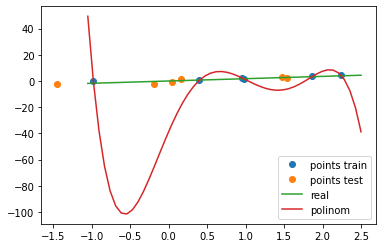

In [ ]:
plt.plot(X_tr, y_tr, 'o', label = 'points train')
plt.plot(X_ts, y_ts, 'o', label = 'points test')
plt.plot(np.linspace(x_begin, x_end), w*np.linspace(x_begin, x_end), '-', label = 'real')
plt.plot(np.linspace(x_begin, x_end), y_polinom, '-', label = 'polinom')

plt.legend(loc='best')
plt.show()

# –ë–æ—Ä—å–±–∞ —Å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ–º

–ë–æ—Ä–æ—Ç—å—Å—è —Å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è–º –º–æ–∂–Ω–æ –º–Ω–æ–≥–∏–º–∏ —Å–ø–æ—Å–æ–±–∞–º–∏:
1. –ò–∑–º–µ–Ω–µ–Ω–∏—è —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –º–æ–¥–µ–ª–∏
2. –î–æ–±–∞–≤–ª–µ–Ω–∏–µ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ç–æ—Ä–æ–≤
3. ...

–ù–æ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –º–µ—Ç–æ–¥–æ–≤ –±–æ—Ä—å–±—ã —Å —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–µ–π –¥–æ–±–∞–≤–ª—è—é—Ç —Å–≤–æ–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (–≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã), –∫–æ—Ç–æ—Ä—ã–µ —Ç–∞–∫–∂–µ –Ω—É–∂–Ω–æ –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å. –û–±—ã—á–Ω–æ –¥–ª—è –∏—Ö –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –∏ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –º–µ—Ç–æ–¥ Cross-Validation –∏ Leave One Out.

–î–ª—è –Ω–∞—à–µ–≥–æ —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–æ–≥–æ –ø—Ä–∏–º–µ—Ä–∞. –í –∫–∞—á–µ—Å—Ç–≤–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ $\mu$ –º–æ–∂–Ω–æ —Ä–∞—Å—Å–º–æ—Ç—Ç—Ä–µ—Ç—å —Å—Ç–µ–ø–µ–Ω—å –ø–æ–ª–∏–Ω–æ–º–∞ –¥–ª—è –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏ (–∏–∑–º–µ–Ω–µ–Ω–∏—è —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –º–æ–¥–µ–ª–∏).

–ü—Ä–∏–º–µ—Ä, –≥–¥–µ —Ä–µ–∞–ª—å–Ω–æ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è LOO –±—É–¥–µ—Ç —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω –Ω–∞ —Å–ª–µ–¥—É—é—â–µ–π –ª–µ–∫—Ü–∏–∏.

# –†–∞–∑–Ω—ã–µ –∑–∞–¥–∞—á–∏ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è

–ó–∞–¥–∞—á–∏ –º–∞—à–∏–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è –º–æ–∂–Ω–æ —Ä–∞–∑–¥–µ–ª–∏—Ç—å –Ω–∞ –¥–≤–∞ —Ç–∏–ø–∞:
1. –†–µ—à–∞–µ—Ç—Å—è –æ–¥–Ω–∞ –ø—Ä–∏–∫–ª–∞–¥–Ω–∞—è –∑–∞–¥–∞—á–∞. –í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –æ—Å–Ω–æ–≤–Ω–æ–π —Ü–µ–ª—å—é —è–≤–ª—è–µ—Ç—Å—è –ø–æ–ª—É—á–∏—Ç—å –Ω–∞–∏–ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –Ω–∞ –æ—Ç–ª–æ–∂–µ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ. –í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –æ–±—ã—á–Ω–æ –µ—Å—Ç—å –æ–¥–Ω–∞ –≤—ã–±–æ—Ä–∫–∞ –∏ –Ω—É–∂–Ω–æ –ø–µ—Ä–µ–±—Ä–∞—Ç—å –≤—Å–µ –≤–æ–∑–º–æ–∂–Ω—ã–µ –º–µ—Ç–æ–¥—ã –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç.
2. –¢–µ—Å—Ç–∏—Ä—É–µ—Ç—Å—è –º–µ—Ç–æ–¥ –Ω–∞ –±–æ–ª—å—à–æ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ —Ä–µ–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö. –í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –æ—Å–Ω–æ–≤–Ω–æ–π —Ü–µ–ª—å—é —è–≤–ª—è–µ—Ç—Å—è –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞—Ç—å –Ω–æ–≤—ã–π –º–µ—Ç–æ–¥ –Ω–∞ —à–∏—Ä–æ–∫–æ–º —Å–ø–µ–∫—Ç—Ä–µ –∑–∞–¥–∞—á. –†–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—é—Ç—Å—è –∑–∞–¥–∞—á–∏ –∏–∑ —Ä–∞–∑–Ω—ã—Ö –æ–±–ª–∞—Å—Ç–µ–π.
3. –¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –º–µ—Ç–æ–¥–∞ –Ω–∞ –±–æ–ª—å—à–æ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö/ –ø–æ–ª—É—Å–∏–Ω—Ç–µ—Ç—Ç–∏–∏—á–µ—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö. –°–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ –ø–æ–∑–≤–æ–ª—è—é—Ç –ø—Ä–æ–≤–µ—Ä—è—Ç—å —Ä–∞–∑–Ω—ã–µ –≥–∏–ø–æ—Ç–µ–∑—ã –æ –º–æ–¥–µ–ª–∏.

## –ó–∞–¥–∞—á–∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏

$$
\hat{w} = \arg\min_{w \in ùëæ} ùìõ\bigr(w, \textbf{X}, \textbf{y}\bigr),
$$

–í–∞—Ä–∏–∞–Ω—Ç—ã —Ä–µ—à–µ–Ω–∏—è:
1. –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–æ–µ —Ä–µ—à–µ–Ω–∏–µ
2. —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã–Ω–π —Å–ø—É—Å–∫

In [13]:
np.random.seed(0)
l = 40

# –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö
x = np.linspace(0, 30, num=l)
Y = x + 4*np.sin(x) + 3*np.random.randn(l)

# –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
X = np.vstack([np.ones_like(x), x, np.sin(x)]).T

# –†–µ—à–µ–Ω–∏–µ –∑–∞–¥–∞—á–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ - –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–∏–π –º–µ—Ç–æ–¥
w = np.linalg.inv(X.T@X)@X.T@Y

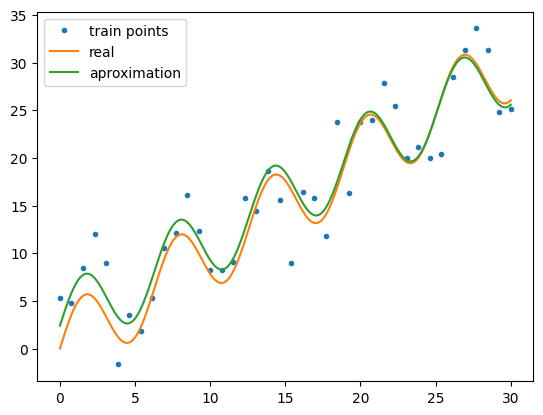

In [14]:
plt.plot(x, Y, '.', label='train points')

x_plot = np.linspace(0, 30, num=10000)
plt.plot(x_plot, 4*np.sin(x_plot) + x_plot, label='real')

X_plot = np.vstack([np.ones_like(x_plot), x_plot, np.sin(x_plot)]).T
plt.plot(x_plot, X_plot@w, label='aproximation')

plt.legend(loc='best')
plt.show()

–ó–∞–¥–∞—á–∞ –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
–î–∞–Ω–Ω–∞—è –∑–∞–¥–∞—á–∞ –Ω–µ —Ä–µ—à–∞–µ—Ç—Å—è –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–∏, —Ç–∞–∫ –∫–∞–∫ –Ω–µ–≤–æ–∑–º–æ–∂–Ω–æ —Ñ—É–Ω–∫—Ü–∏—è –Ω–µ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä—É–µ–º–∞

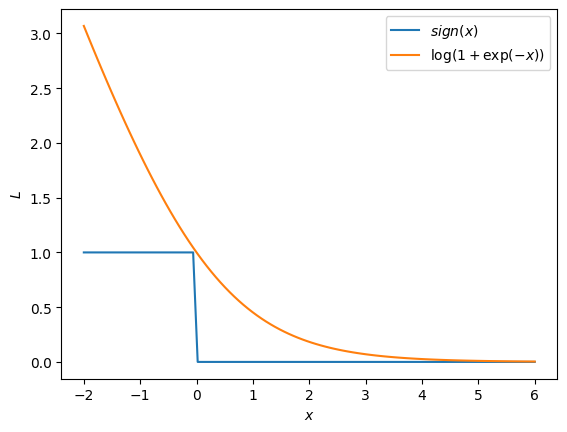

In [33]:
def sign(x):
    return np.array(x <= 0, dtype=np.int64)
def upper_bound(x):
    return np.log2(1+np.exp(-x))

x = np.linspace(-2, 6, 100)
plt.plot(x, sign(x), label='$sign(x)$')
plt.plot(x, upper_bound(x), label='$\log(1+\exp(-x))$')

plt.xlabel('$x$')
plt.ylabel('$L$')
plt.legend(loc='best')
plt.show()

In [34]:
torch.manual_seed(0)

l = 1000
n = 2

X = torch.randn([l, n])
w_true = torch.randn([n])
Y = torch.ones([l])
Y[X@w_true < 0] = -1

In [28]:
torch.manual_seed(0)
np.random.seed(0)
w = torch.randn([n], requires_grad=True)

K = l
list_of_loss_sqrt = []
for k in range(1, K+1):
    # –°—á–∏—Ç–∞–µ–º –æ—à–∏–±–∫—É L –Ω–∞ k-–º —à–∞–≥–µ
    with torch.no_grad():
        list_of_loss_sqrt.append(
            torch.mean(torch.log2(1+torch.exp(-Y*(X@w)))))

    # –≤—ã–±–∏—Ä–∞–µ–º —Å–ª—É—á–∞–π–Ω—ã–π —ç–ª–µ–º–µ–Ω—Ç –∏–∑ –≤—ã–±–æ—Ä–∫–∏
    ind = np.random.randint(low=0, high=l)
    alpha = 1/np.sqrt(k)

    # —Å—á–∏—Ç–∞–µ–º –æ—à–∏–±–∫—É –Ω–∞ —ç–ª–µ–º–µ–Ω—Ç–µ
    q = torch.log2(1+torch.exp(-Y[ind]*(X[ind]@w)))

    # —Å—á–∏—Ç–∞–µ–º q —Å –∫—Ä—ã—à–∫–æ–π
    q.backward()

    # –¥–µ–ª–∞–µ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —à–∞–≥
    with torch.no_grad():
        w.add_(w.grad, alpha=-1*alpha)

    # –æ–±–Ω—É–ª—è–µ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç
    w.grad.zero_()

In [35]:
pred = torch.ones([l])
pred[X@w < 0] = -1
print('–¢–æ—á–Ω–æ—Å—Ç—å –ø—Ä–æ–≥–Ω–æ–∑–∞: {}'.format(torch.mean((pred == Y).float()).item()))

–¢–æ—á–Ω–æ—Å—Ç—å –ø—Ä–æ–≥–Ω–æ–∑–∞: 0.9890000224113464


In [36]:
torch.manual_seed(0)
np.random.seed(0)
w = torch.randn([n], requires_grad=True)

K = l
list_of_loss = []
for k in range(1, K+1):
    # –°—á–∏—Ç–∞–µ–º –æ—à–∏–±–∫—É L –Ω–∞ k-–º —à–∞–≥–µ
    with torch.no_grad():
        list_of_loss.append(torch.mean(torch.log2(1+torch.exp(-Y*(X@w)))))

    # –≤—ã–±–∏—Ä–∞–µ–º —Å–ª—É—á–∞–π–Ω—ã–π —ç–ª–µ–º–µ–Ω—Ç –∏–∑ –≤—ã–±–æ—Ä–∫–∏
    ind = np.random.randint(low=0, high=l)
    alpha = 1/k

    # —Å—á–∏—Ç–∞–µ–º –æ—à–∏–±–∫—É –Ω–∞ —ç–ª–µ–º–µ–Ω—Ç–µ
    q = torch.log2(1+torch.exp(-Y[ind]*(X[ind]@w)))

    # —Å—á–∏—Ç–∞–µ–º g —Å –∫—Ä—ã—à–∫–æ–π
    q.backward()

    # –¥–µ–ª–∞–µ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —à–∞–≥
    with torch.no_grad():
        w.add_(w.grad, alpha=-1*alpha)

    # –æ–±–Ω—É–ª—è–µ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç
    w.grad.zero_()

In [37]:
torch.manual_seed(0)
w = torch.randn([n], requires_grad=True)

dataset = torch.utils.data.TensorDataset(X, Y)
generator = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

optimizer = torch.optim.SGD([w], lr=1)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer,
                                              lambda k: 1/np.sqrt(k+1))

list_of_loss_torch = []
for x, y in generator:
    optimizer.zero_grad()

    # –°—á–∏—Ç–∞–µ–º –æ—à–∏–±–∫—É L –Ω–∞ k-–º —à–∞–≥–µ
    with torch.no_grad():
        list_of_loss_torch.append(
            torch.mean(torch.log2(1+torch.exp(-Y*(X@w)))))

    q = torch.log2(1+torch.exp(-y*(x@w))).mean()

    q.backward()

    optimizer.step()
    scheduler.step()

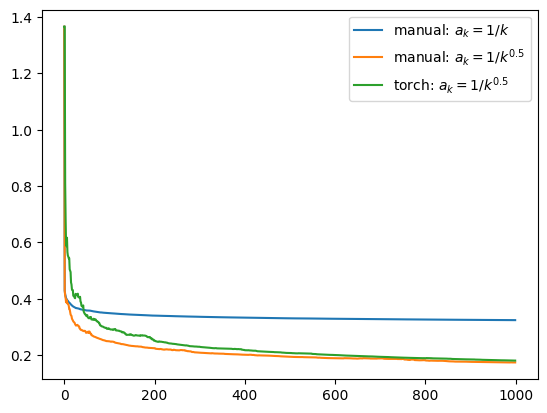

In [32]:
plt.plot(list_of_loss, label="manual: $a_k = 1/k$")
plt.plot(list_of_loss_sqrt, label="manual: $a_k = 1/k^{0.5}$")
plt.plot(list_of_loss_torch, label="torch: $a_k = 1/k^{0.5}$")
plt.legend(loc='best')
plt.show()

### LOO

Leave-one-out - –º–µ—Ç–æ–¥ –∫—Ä–æ—Å—Å –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –¥–∞–Ω—ã—Ö

In [38]:
np.random.seed(0)
l = 1000
n = 2

X_train = np.random.randn(l, n)
X_test = np.random.randn(500, n)
w = np.random.randn(n)
Y_train = np.random.binomial(n=1, p=expit(X_train@w))
Y_test = np.random.binomial(n=1, p=expit(X_test@w))

In [24]:
gammas = [1e-10, 1e-4, 1e-3, 1e-2, .1, 1., 10., 1e2, 1e3, 1e4, 1e10]

In [39]:
loo = LeaveOneOut()
number_of_batch = loo.get_n_splits(X_train)

gamma_scores = dict()
for gamma in tqdm(gammas):
    list_of_scores = []
    for train_index, test_index in tqdm(loo.split(X_train),
                                        total=number_of_batch, leave=False):
        x_train, x_test = X_train[train_index], X_train[test_index]
        y_train, y_test = Y_train[train_index], Y_train[test_index]

        model = LogisticRegression(penalty='l2', C=2/gamma, solver='saga',
                                   fit_intercept=False, random_state=0)
        model.fit(x_train, y_train)
        list_of_scores.append(model.score(x_test, y_test))

    gamma_scores[gamma] = np.mean(list_of_scores)

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [40]:
best_gamma = sorted(gamma_scores,
                    key=lambda x: gamma_scores[x], reverse=True)[0]

model = LogisticRegression(penalty='l2', C=2/best_gamma, fit_intercept=False,
                           random_state=0, solver='saga')
model.fit(X_train, Y_train)
print('–¢–æ—á–Ω–æ—Å—Ç—å: {}'.format(model.score(X_test, Y_test)))

–¢–æ—á–Ω–æ—Å—Ç—å: 0.768


In [41]:
best_gamma

1e-10

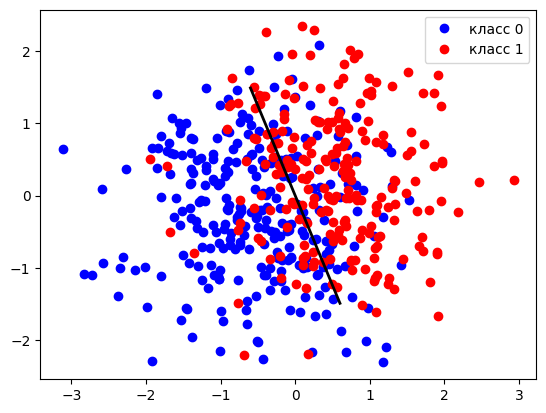

In [42]:
cols = ['blue', 'red']

for k in np.unique(Y_test):
    plt.plot(X_test[Y_test==k,0], X_test[Y_test==k,1], 'o',
             label='–∫–ª–∞—Å—Å {}'.format(k), color=cols[k])

plt.plot(*get_line(*model.coef_[0], x_min=-0.6, x_max=0.6),
         linewidth=2, color='black')

plt.legend(loc='best')
plt.show()